# Global Power Plant Database

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# show the all rows and columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
# load the dataset
df = pd.read_csv('Global Power Plant Database.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.500,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.000,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.200,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.000,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.000,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.000,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.000,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.000,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.000,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.000,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [4]:
# rows and columns
df.shape

(907, 27)

In [5]:
# checking the null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [6]:
# drop unnecessary data
data = df.drop(['country','wepp_id','url','country_long','geolocation_source','name','gppd_idnr','other_fuel2','other_fuel3','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],axis = 1)

In [7]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
enc = OrdinalEncoder()
le =LabelEncoder()

In [8]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(df[i].values.reshape(-1,1))
        data[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [9]:
data.tail()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
902,1600.0,16.2949,77.3568,1,2,2016.0,280,22,2019.0,NaN,0.994875,233.59665,865.4,686.5,0
903,3.0,12.8932,78.1654,6,3,NaN,114,77,NaN,NaN,NaN,NaN,NaN,NaN,1
904,25.5,15.2758,75.5811,7,3,NaN,280,21,NaN,NaN,NaN,NaN,NaN,NaN,1
905,80.0,24.3500,73.7477,1,3,NaN,91,59,NaN,NaN,NaN,NaN,NaN,NaN,1
906,16.5,9.9344,77.4768,7,3,NaN,279,21,NaN,NaN,NaN,NaN,NaN,NaN,1


In [10]:
# fill the null values
from sklearn.impute import SimpleImputer
im = SimpleImputer(missing_values=np.nan, strategy='mean')

data['latitude'] = im.fit_transform(data['latitude'].values.reshape(-1,1))
data['longitude'] = im.fit_transform(data['longitude'].values.reshape(-1,1))




imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['owner']=imp.fit_transform(data['owner'].values.reshape(-1,1))
data['other_fuel1'] = imp.fit_transform(data['other_fuel1'].values.reshape(-1,1))
data['year_of_capacity_data']=imp.fit_transform(data['year_of_capacity_data'].values.reshape(-1,1))
data['commissioning_year']= imp.fit_transform(data['commissioning_year'].values.reshape(-1,1))
data['generation_gwh_2014']=imp.fit_transform(data['generation_gwh_2014'].values.reshape(-1,1))
data['generation_gwh_2015']=imp.fit_transform(data['generation_gwh_2015'].values.reshape(-1,1))
data['generation_gwh_2016']=imp.fit_transform(data['generation_gwh_2016'].values.reshape(-1,1))
data['generation_gwh_2017']=imp.fit_transform(data['generation_gwh_2017'].values.reshape(-1,1))
data['generation_gwh_2018']=imp.fit_transform(data['generation_gwh_2018'].values.reshape(-1,1))
data['generation_data_source']=imp.fit_transform(data['generation_data_source'].values.reshape(-1,1))

In [11]:
data

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.500,28.183900,73.240700,6,3,2011.0,229,109,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,98.000,24.766300,74.609000,1,3,2015.0,258,174,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,39.200,21.903800,69.373200,7,3,2015.0,2,21,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,135.000,23.871200,91.360200,2,3,2004.0,280,22,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.000,21.960300,82.409100,1,2,2015.0,280,22,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
5,250.000,23.768900,68.644700,1,2,2005.0,280,22,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,0
6,60.000,10.454700,77.007800,3,3,1970.0,280,22,2019.0,157.558250,152.195200,61.421350,89.629600,48.327150,0
7,192.000,32.225800,77.207000,3,3,2010.0,280,22,2019.0,674.391100,721.335200,675.724400,679.594950,579.318850,0
8,290.000,16.330000,75.886300,3,3,2004.0,280,22,2019.0,480.594950,144.434200,402.029750,439.372100,406.377900,0
9,210.000,23.164200,81.637300,1,2,2008.0,280,22,2019.0,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,0


In [12]:
# check columns
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'year_of_capacity_data',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [13]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    int32  
 4   other_fuel1             907 non-null    int32  
 5   commissioning_year      907 non-null    float64
 6   owner                   907 non-null    int32  
 7   source                  907 non-null    int32  
 8   year_of_capacity_data   907 non-null    float64
 9   generation_gwh_2014     907 non-null    float64
 10  generation_gwh_2015     907 non-null    float64
 11  generation_gwh_2016     907 non-null    float64
 12  generation_gwh_2017     907 non-null    float64
 13  generation_gwh_2018     907 non-null    float64
 14  generation_data_source  907 non-null    in

In [14]:
data.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

<AxesSubplot:>

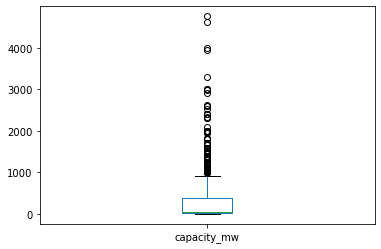

In [15]:
data['capacity_mw'].plot.box()

<AxesSubplot:>

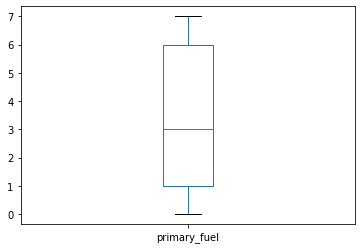

In [16]:
data['primary_fuel'].plot.box()

<AxesSubplot:>

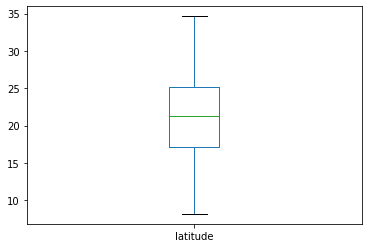

In [17]:
data['latitude'].plot.box()

<AxesSubplot:>

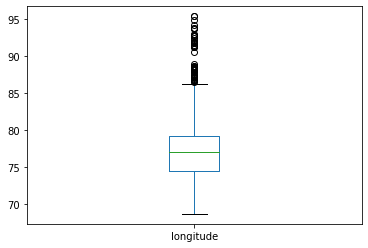

In [18]:
data['longitude'].plot.box()

<AxesSubplot:>

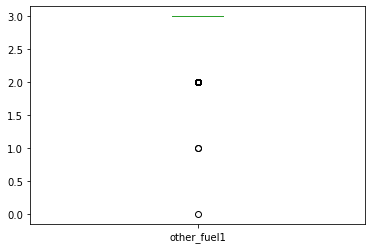

In [19]:
data['other_fuel1'].plot.box()

<AxesSubplot:>

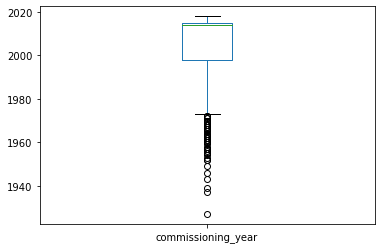

In [20]:
data['commissioning_year'].plot.box()

<AxesSubplot:>

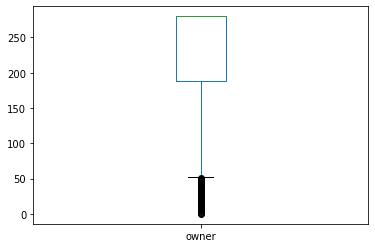

In [21]:
data['owner'].plot.box()

<AxesSubplot:>

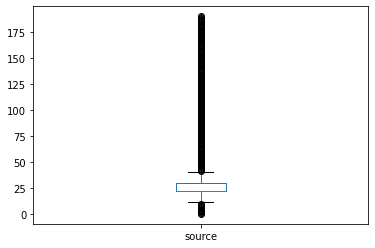

In [22]:
data['source'].plot.box()

<AxesSubplot:>

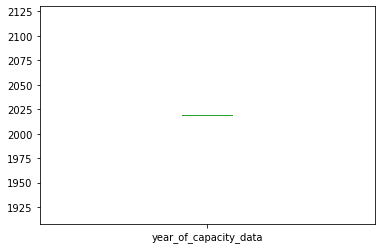

In [23]:
data['year_of_capacity_data'].plot.box()

<AxesSubplot:>

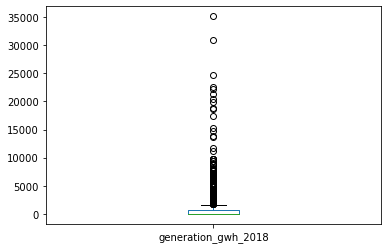

In [24]:
data['generation_gwh_2018'].plot.box()

<AxesSubplot:>

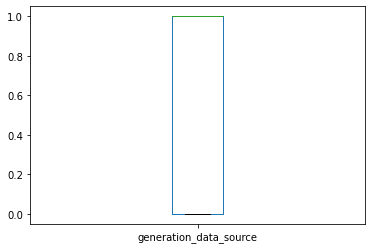

In [25]:
data['generation_data_source'].plot.box()

# scatterplot

<AxesSubplot:xlabel='commissioning_year', ylabel='owner'>

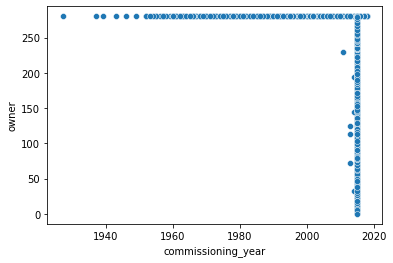

In [26]:
sns.scatterplot(x="commissioning_year", y="owner", data=data)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

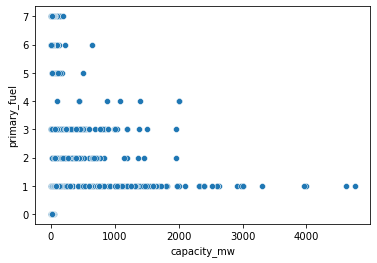

In [27]:
sns.scatterplot(x="capacity_mw", y="primary_fuel", data=data)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

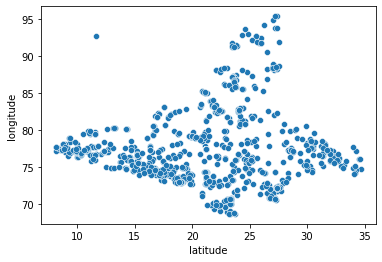

In [28]:
sns.scatterplot(x="latitude", y="longitude", data=data)

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='source'>

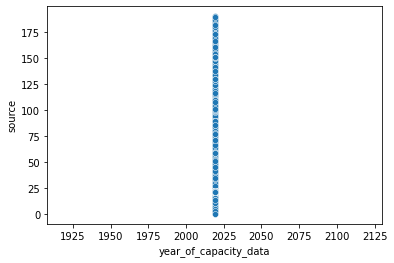

In [29]:
sns.scatterplot(x="year_of_capacity_data", y="source", data=data)

<AxesSubplot:xlabel='commissioning_year', ylabel='owner'>

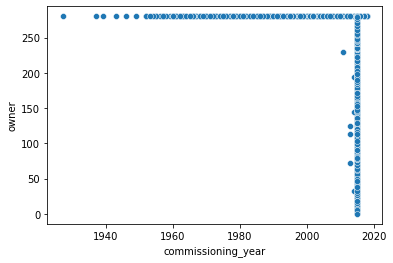

In [30]:
sns.scatterplot(x="commissioning_year", y="owner", data=data)

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='generation_data_source'>

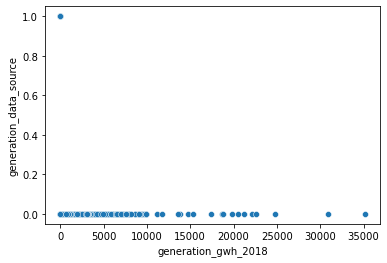

In [31]:
sns.scatterplot(x="generation_gwh_2018", y="generation_data_source", data=data)

## correlation

In [32]:
data_cor = data.corr()
data_cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
capacity_mw,1.000000,0.050984,0.195882,-0.380395,-0.606289,-0.004072,0.304322,-0.242122,NaN,0.815794,0.842964,0.876811,0.894259,0.906774,-0.495833
latitude,0.050984,1.000000,0.036362,-0.010204,-0.032790,0.034519,0.007221,0.055927,NaN,0.063351,0.059343,0.053012,0.067991,0.062911,-0.086910
longitude,0.195882,0.036362,1.000000,-0.347948,-0.275689,-0.159025,0.278443,-0.239333,NaN,0.143435,0.157995,0.180983,0.196417,0.195423,-0.409803
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,0.476410,0.164947,-0.260389,0.053613,NaN,-0.285822,-0.291273,-0.304119,-0.313935,-0.315301,0.482339
other_fuel1,-0.606289,-0.032790,-0.275689,0.476410,1.000000,-0.019109,-0.324999,0.254138,NaN,-0.490559,-0.500829,-0.522554,-0.539283,-0.541120,0.524183
commissioning_year,-0.004072,0.034519,-0.159025,0.164947,-0.019109,1.000000,-0.412890,0.322222,NaN,-0.093965,-0.058619,-0.034681,-0.025173,-0.021896,0.390076
owner,0.304322,0.007221,0.278443,-0.260389,-0.324999,-0.412890,1.000000,-0.243587,NaN,0.228491,0.227931,0.236302,0.242964,0.244030,-0.620010
source,-0.242122,0.055927,-0.239333,0.053613,0.254138,0.322222,-0.243587,1.000000,NaN,-0.178673,-0.178234,-0.184780,-0.189989,-0.190823,0.484827
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.815794,0.063351,0.143435,-0.285822,-0.490559,-0.093965,0.228491,-0.178673,NaN,1.000000,0.966869,0.938079,0.907753,0.898900,-0.368528


<AxesSubplot:>

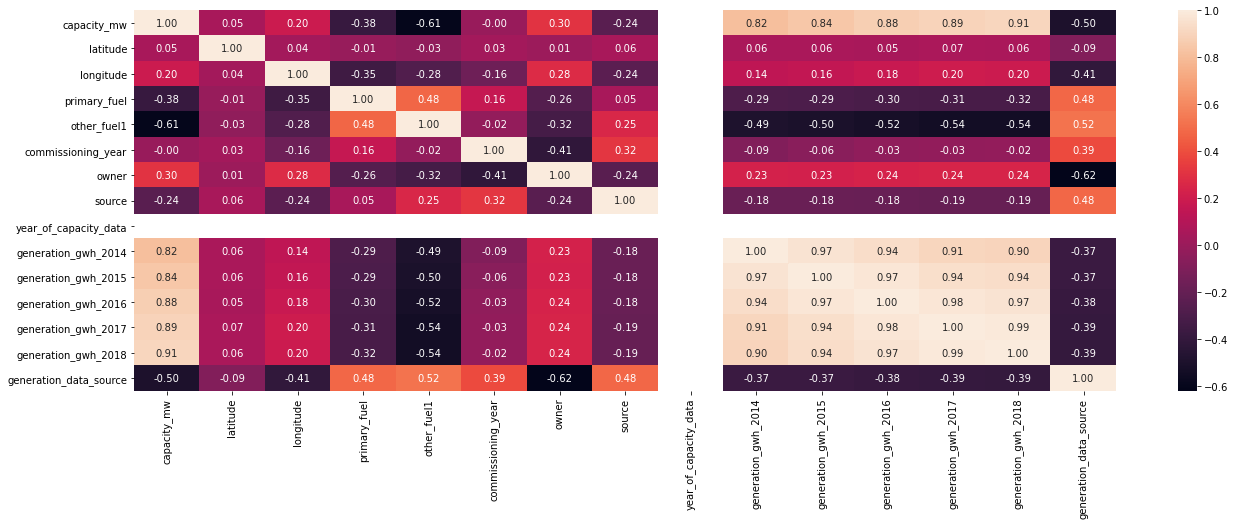

In [33]:
plt.figure(figsize=(22,7))
sns.heatmap(data_cor,annot =True , fmt='0.2f')

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

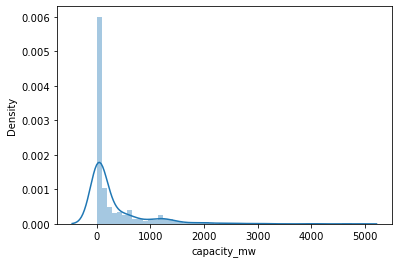

In [34]:
sns.distplot(data['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

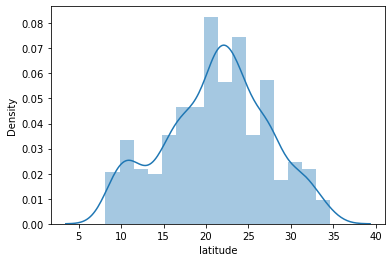

In [35]:
sns.distplot(data['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

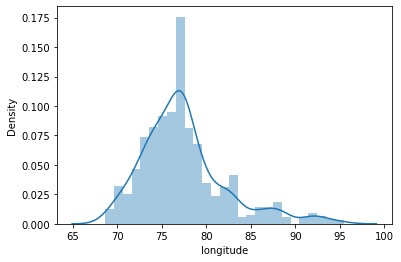

In [36]:
sns.distplot(data['longitude'])

sns.distplot(data['primary_fuel'])

<AxesSubplot:xlabel='other_fuel1', ylabel='Density'>

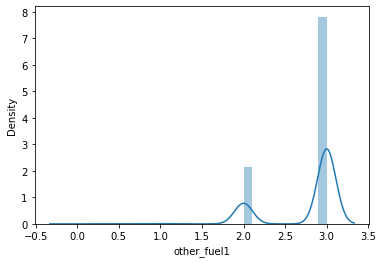

In [37]:
sns.distplot(data['other_fuel1'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

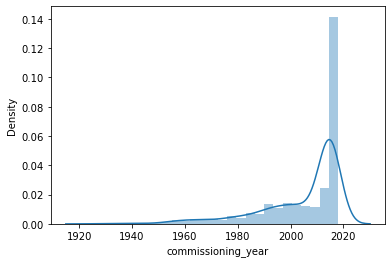

In [38]:
sns.distplot(data['commissioning_year'])

<AxesSubplot:xlabel='owner', ylabel='Density'>

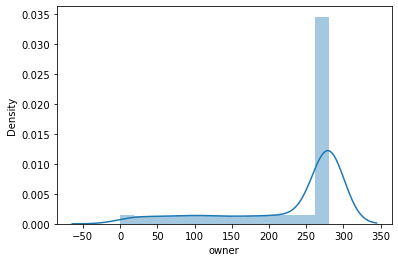

In [39]:
sns.distplot(data['owner'])

<AxesSubplot:xlabel='source', ylabel='Density'>

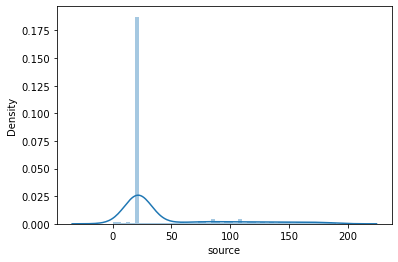

In [40]:
sns.distplot(data['source'])

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

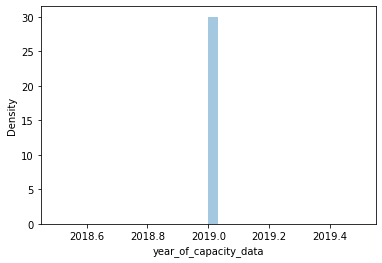

In [41]:
sns.distplot(data['year_of_capacity_data'])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

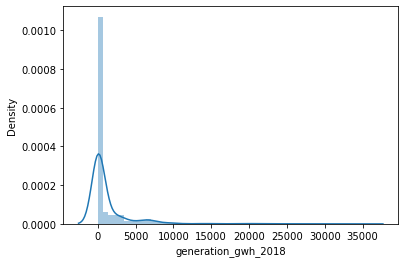

In [42]:
sns.distplot(data['generation_gwh_2018'])

<AxesSubplot:xlabel='generation_data_source', ylabel='Density'>

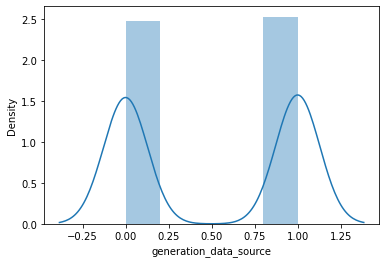

In [43]:
sns.distplot(data['generation_data_source'])

In [44]:
x = data.drop('primary_fuel',axis=1)

In [45]:
y = data['primary_fuel']

## Remove skewness

In [46]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[-1.69576688,  1.1594364 , -0.95254457, ..., -0.87813097,
        -0.88378789,  0.99012592],
       [ 0.19369368,  0.57903232, -0.54497608, ..., -0.87813097,
        -0.88378789,  0.99012592],
       [-0.2923371 ,  0.09991208, -2.3798638 , ..., -0.87813097,
        -0.88378789,  0.99012592],
       ...,
       [-0.52277344, -0.98053644, -0.28081924, ..., -0.87813097,
        -0.88378789,  0.99012592],
       [ 0.08691496,  0.50893808, -0.79637432, ..., -0.87813097,
        -0.88378789,  0.99012592],
       [-0.75589054, -1.81390048,  0.18088944, ..., -0.87813097,
        -0.88378789,  0.99012592]])

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report#mean_squared_error,mean_absolute_error,r2_score

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

# Logistic Regression

In [48]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

print('Accuracy Score',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score 0.7857142857142857
[[ 2  0  0  0  0  0  3  0]
 [ 2 48  0  0  0  0  2  2]
 [ 2  3  5  8  0  1  0  1]
 [ 0  0  2 43  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 1  0  2  0  0  0  1  0]
 [ 0  2  0  0  0  0 20  3]
 [ 0  1  0  0  0  0  2 25]]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.89      0.89      0.89        54
           2       0.56      0.25      0.34        20
           3       0.83      0.96      0.89        45
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       0.71      0.80      0.75        25
           7       0.81      0.89      0.85        28

    accuracy                           0.79       182
   macro avg       0.51      0.52      0.51       182
weighted avg       0.76      0.79      0.76       182



# Random Forest Classifier

In [49]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred1 = rf.predict(x_test)
print('Accuracy score',accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

Accuracy score 0.8516483516483516
[[ 2  1  0  0  0  0  2  0]
 [ 5 48  0  0  0  0  0  1]
 [ 0  2  8  7  1  1  1  0]
 [ 0  0  0 45  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  1  2  0  1  0  0]
 [ 1  0  0  0  0  0 23  1]
 [ 0  0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

           0       0.25      0.40      0.31         5
           1       0.94      0.89      0.91        54
           2       0.89      0.40      0.55        20
           3       0.82      1.00      0.90        45
           4       0.00      0.00      0.00         1
           5       0.50      0.25      0.33         4
           6       0.88      0.92      0.90        25
           7       0.93      1.00      0.97        28

    accuracy                           0.85       182
   macro avg       0.65      0.61      0.61       182
weighted avg       0.86      0.85      0.84       182



# KNeighbors Classifier

In [50]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred2 = kn.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
print(classification_report(y_test,pred2))

Accuracy 0.8021978021978022
[[ 2  2  0  0  0  0  1  0]
 [ 3 48  0  0  0  0  0  3]
 [ 1  2  7  8  0  0  1  1]
 [ 0  0  4 41  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  1  1  0  2  0  0]
 [ 1  5  0  0  0  0 18  1]
 [ 0  0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.84      0.89      0.86        54
           2       0.58      0.35      0.44        20
           3       0.80      0.91      0.85        45
           4       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         4
           6       0.90      0.72      0.80        25
           7       0.85      1.00      0.92        28

    accuracy                           0.80       182
   macro avg       0.66      0.60      0.61       182
weighted avg       0.80      0.80      0.79       182



## Decision Tree Classifier

In [51]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print('Accuracy',accuracy_score(y_test, preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test, preddt))

Accuracy 0.8076923076923077
[[ 2  2  0  0  0  0  1  0]
 [ 3 42  3  0  0  1  4  1]
 [ 0  3 11  4  0  2  0  0]
 [ 0  0  2 40  1  1  1  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  2  1  0  1  0  0]
 [ 1  1  0  0  0  0 23  0]
 [ 0  0  0  0  0  0  0 28]]
              precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           1       0.88      0.78      0.82        54
           2       0.61      0.55      0.58        20
           3       0.89      0.89      0.89        45
           4       0.00      0.00      0.00         1
           5       0.17      0.25      0.20         4
           6       0.79      0.92      0.85        25
           7       0.97      1.00      0.98        28

    accuracy                           0.81       182
   macro avg       0.58      0.60      0.59       182
weighted avg       0.82      0.81      0.81       182



# Cross validation

In [52]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of logistic Regression model :",scr.mean())

Cross validation score of logistic Regression model : 0.7993685872138911


In [53]:
scr = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

Cross validation score of Random Forest model : 0.8787080322991926


In [54]:
scr = cross_val_score(kn, x, y, cv=5)
print('Cross validation score of KNeighbors model :', scr.mean())

Cross validation score of KNeighbors model : 0.8324509744399247


In [55]:
scr = cross_val_score(dt, x, y, cv=5)
print('Cross validation score of Decision Tree  model :', scr.mean())

Cross validation score of Decision Tree  model : 0.8368587213891082


## Hyper parameter tuning

In [56]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth':[4,5,6,7,8],
                'criterion':['gini','entropy']}
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train, y_train) #Fitting the data in model
GCV.best_params_ # printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2'}

In [57]:
GCV_pred = GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test, GCV_pred) #Checking final accuracy

0.8571428571428571

## Saving the model in pickle format

In [58]:
import joblib
joblib.dump(rf,"Global_Power_Plant.pkl")

['Global_Power_Plant.pkl']